In [1]:
# tensor
import tensorflow as tf
import numpy as np

In [2]:
# one dim tensor
tensor1 = tf.constant([3, 4.0, 6, 7, 8, .9])
print(tensor1)

tf.Tensor([3.  4.  6.  7.  8.  0.9], shape=(6,), dtype=float32)


2024-05-04 10:51:22.703900: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-04 10:51:22.703920: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-05-04 10:51:22.703927: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-05-04 10:51:22.703945: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-04 10:51:22.703959: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
tensor2 = tf.constant([[0, 1, 2], [2, 3, 4], [6, 7, 8]])
print(tensor2)

tf.Tensor(
[[0 1 2]
 [2 3 4]
 [6 7 8]], shape=(3, 3), dtype=int32)


# To create ANN to predict handwritten digit classification

In [4]:
# load the dataset
from tensorflow.keras.datasets import mnist
print('data loaded')

data loaded


In [5]:
# create train set & test set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape # number of image, height of image, width of image

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

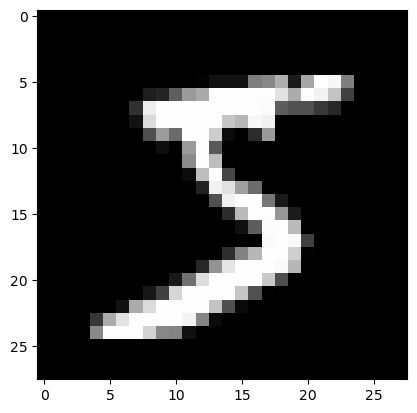

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()

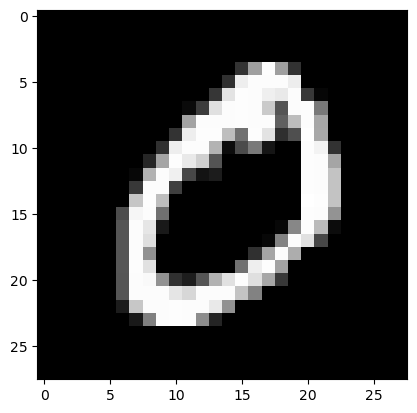

In [11]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [12]:
# preprocessing
# reshape the train & test data to one dim array becoz ANN require one dimension
# 28 * 28 --- 784

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [13]:
X_train.shape

(60000, 784)

In [14]:
# normalize the pixels from 0 to 1, right now pixels are from 0 to 255
X_train = X_train/255.
X_test = X_test/255.

In [15]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
# convert class vectors into one hot encoding
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [17]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

1. create the architecture
2. compile the model
3. fit the model
4. evaluation & predict

In [18]:
# import the library
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
print('Imported')

Imported


#Create Architecture
1. 3 hidden layers
2. Nodes in each hidden layers 100, 64, 32
3. Activation function - Retified Linear Unit Hidden Layer (Relu hidden layer)
4. output layer - Softmax

In [19]:
model = Sequential()

model.add(keras.Input(shape=(784,)))

# First Hidden Layer
model.add(Dense(100, activation='relu'))

# Second Hidden Layer
model.add(Dense(64, activation='relu'))

# Third Hidden Layer
model.add(Dense(32, activation='relu'))

#output layer
model.add(Dense(10, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,374 (341.30 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the model
1. loss function
2. optimizer
3. evaluate accuracy

In [21]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # adapative momemtum estimation optimizer
print('model is compiled')

model is compiled


In [22]:
# initial weights & bias
for layer in model.layers:
    if hasattr(layer, 'weights'):
      weights, biases = layer.get_weights()
      print('shape', weights.shape)
      print(f'layer name {layer.name}:')
      print(weights)
      print('shape', biases.shape)
      print(f'layer name {layer.name}:')
      print(biases)

shape (784, 100)
layer name dense:
[[-0.03735716 -0.07339896  0.00490196 ... -0.00988514  0.02223017
   0.05120946]
 [ 0.07368127  0.0298434  -0.01986906 ...  0.05612139 -0.00366148
   0.06580836]
 [ 0.06650905  0.0289091  -0.07511538 ...  0.05032454 -0.02631655
   0.07567824]
 ...
 [-0.05270318  0.04318362 -0.02883193 ... -0.03211574  0.0775777
   0.05063649]
 [ 0.02226713  0.05680969  0.05623227 ... -0.00877605 -0.00525071
   0.02507169]
 [ 0.05393624  0.00878873  0.00103504 ...  0.01745706 -0.05289009
  -0.06794849]]
shape (100,)
layer name dense:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (100, 64)
layer name dense_1:
[[ 0.09448831  0.15269814  0.13961197 ...  0.14646147  0.16499414
  -0.05886358]
 [ 0.06643032  0.031

In [23]:
# Evaluate & predict

In [24]:
# training
batch_size = 128
epochs = 10 # complete cycle where whole training data is passed

history = model.fit(X_train, y_train, batch_size=batch_size, epochs = epochs, validation_data=(X_test, y_test))

Epoch 1/10


2024-05-04 10:51:24.778182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.7830 - loss: 0.7313 - val_accuracy: 0.9464 - val_loss: 0.1819
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9523 - loss: 0.1617 - val_accuracy: 0.9633 - val_loss: 0.1277
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9676 - loss: 0.1136 - val_accuracy: 0.9668 - val_loss: 0.1120
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9745 - loss: 0.0878 - val_accuracy: 0.9693 - val_loss: 0.0936
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9808 - loss: 0.0651 - val_accuracy: 0.9717 - val_loss: 0.0916
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9839 - loss: 0.0547 - val_accuracy: 0.9745 - val_loss: 0.0838
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9857 - loss: 0.0473 - val_accuracy: 0.9759 - val_loss: 0.0834
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 60ms/step - accuracy: 0.9890 - loss: 0.0348 - val_accurac

In [25]:
# evaluate the model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.9688 - loss: 0.1119


[0.09633699059486389, 0.9740999937057495]

In [26]:
# train accuracy
model.evaluate(X_train, y_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.9902 - loss: 0.0297


[0.0298236683011055, 0.9903166890144348]

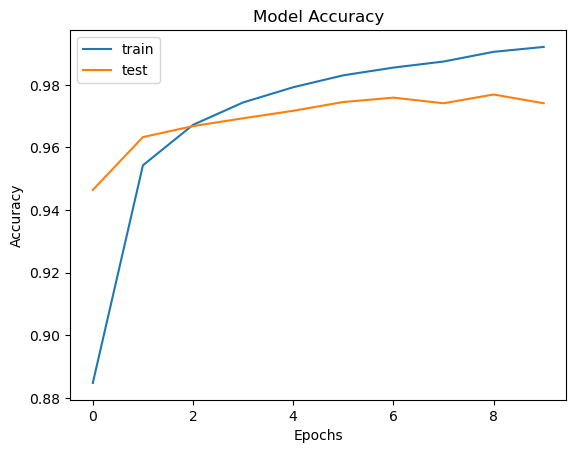

In [27]:
# plot the graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='best')
plt.show()

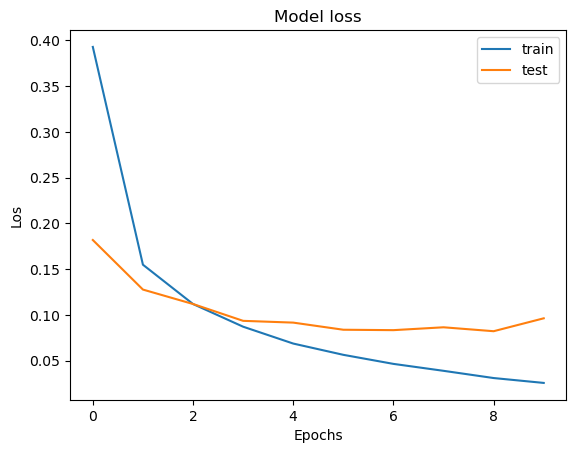

In [28]:
# plot the losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Los')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [29]:
# save the model
model.save('handwritten_digit_prediction.h5')
print("model saved")

model saved


In [30]:
# load the model
from tensorflow.keras.models import load_model

loaded_model = load_model('handwritten_digit_prediction.h5')
print('model loaded')


model loaded


In [31]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,376 (341.32 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
# predictions
y_pred = loaded_model(X_test)

In [33]:
y_pred[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4.3063901e-07, 1.3335341e-06, 7.6160950e-07, 2.5957819e-05,
       3.1733876e-08, 1.3687591e-09, 4.7680246e-13, 9.9996340e-01,
       6.1003931e-07, 7.5283087e-06], dtype=float32)>

In [34]:
np.argmax(y_pred[0])

7

In [35]:
# see all outputs
y_predict = np.argmax(y_pred, axis=1)

In [36]:
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [37]:
# create train set & test set
(X_train1, y_train1), (X_test1, y_test1) = mnist.load_data()

In [38]:
y_test1

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

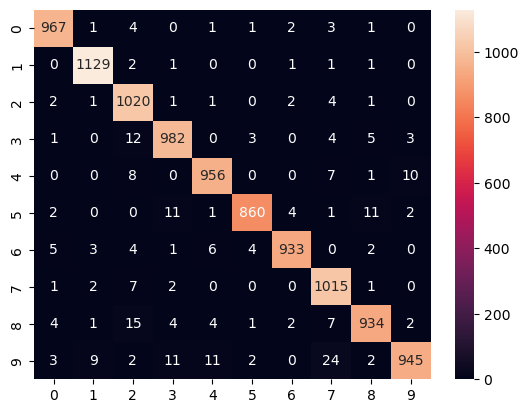

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_predict)

import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [40]:
# initial weights & bias
for layer in loaded_model.layers:
    if hasattr(layer, 'weights'):
      weights, biases = layer.get_weights()
      print('shape', weights.shape)
      print(f'layer name {layer.name}:')
      print(weights)
      print('shape', biases.shape)
      print(f'layer name {layer.name}:')
      print(biases)

shape (784, 100)
layer name dense:
[[-0.03735716 -0.07339896  0.00490196 ... -0.00988514  0.02223017
   0.05120946]
 [ 0.07368127  0.0298434  -0.01986906 ...  0.05612139 -0.00366148
   0.06580836]
 [ 0.06650905  0.0289091  -0.07511538 ...  0.05032454 -0.02631655
   0.07567824]
 ...
 [-0.05270318  0.04318362 -0.02883193 ... -0.03211574  0.0775777
   0.05063649]
 [ 0.02226713  0.05680969  0.05623227 ... -0.00877605 -0.00525071
   0.02507169]
 [ 0.05393624  0.00878873  0.00103504 ...  0.01745706 -0.05289009
  -0.06794849]]
shape (100,)
layer name dense:
[-0.0639763   0.03726357  0.04684483  0.03738687  0.04730544  0.10641588
 -0.09112192 -0.04520502  0.08188313  0.09129047 -0.03824021 -0.00514882
  0.03808446  0.03468144  0.03217233 -0.00445841  0.07085953  0.05305354
 -0.06398962  0.03509682 -0.04120656 -0.05109663 -0.05046831 -0.02624654
  0.14558227  0.13003504  0.0877735   0.04369706  0.06050056  0.17481342
  0.06672684  0.08526867 -0.01325885 -0.02714766  0.00485329  0.16719867
  0.0

In [41]:
import numpy as np
from PIL import Image

new_image = Image.open('sample_image.png')

#Convert the image to grey scale
new_image = new_image.convert('L').resize((28, 28))

new_digit = np.array(new_image) / 255.0

new_digit = new_digit.reshape((1, 784))

predictions = loaded_model.predict(new_digit)

predicted_digit = np.argmax(predictions)

print(predictions)
print("Predicted digit is ", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step
[[2.6414608e-07 1.4674902e-06 5.6602204e-07 1.0782795e-05 1.6913646e-08
  5.3648974e-10 3.1748226e-13 9.9998319e-01 2.8777350e-07 3.3662091e-06]]
Predicted digit is  7
